In [1]:
# coding=utf-8

import os
import pandas as pd
import nltk
from collections import Counter

ROOTDIR = os.path.abspath(os.path.abspath(os.path.join(os.getcwd(), "..")))
DATADIR = os.path.join(ROOTDIR, 'data')
MODELDIR = os.path.join(ROOTDIR, 'model')

In [2]:
df = pd.read_csv(os.path.join(DATADIR, 'question.csv'), nrows=100000)
texts = df.translatedContent

texts

0       给定一个整数数组 nums 和一个目标值 target，请你在该数组中找出和为目标值的那 两...
1       给出两个 非空 的链表用来表示两个非负的整数。其中，它们各自的位数是按照 逆序 的方式存储的...
2       给定一个字符串，请你找出其中不含有重复字符的 最长子串 的长度。\n示例 1:\n输入: "...
3       给定两个大小为 m 和 n 的正序（从小到大）数组 nums1 和 nums2。\n请你找出...
4       给定一个字符串 s，找到 s 中最长的回文子串。你可以假设 s 的最大长度为 1000。\n...
                              ...                        
1152    给你一个数组 points 和一个整数 k 。数组中每个元素都表示二维平面上的点的坐标，并按...
1153    给你一个数字数组 arr 。\n如果一个数列中，任意相邻两项的差总等于同一个常数，那么这个数...
1154    有一块木板，长度为 n 个 单位 。一些蚂蚁在木板上移动，每只蚂蚁都以 每秒一个单位 的速度...
1155    给你一个只包含 0 和 1 的 rows * columns 矩阵 mat ，请你返回有多少...
1156    给你一个字符串 num 和一个整数 k 。其中，num 表示一个很大的整数，字符串中的每个字...
Name: translatedContent, Length: 1157, dtype: object

In [3]:
#分词
import jieba

seg_list = jieba.cut(texts[0], HMM=False)
print(list(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\frank\AppData\Local\Temp\jieba.cache
Loading model cost 0.502 seconds.
Prefix dict has been built successfully.


['给定', '一个', '整数', '数组', ' ', 'nums', ' ', '和', '一个', '目标值', ' ', 'target', '，', '请', '你', '在', '该', '数组', '中', '找出', '和', '为', '目标值', '的', '那', ' ', '两个', ' ', '整数', '，', '并', '返回', '他们', '的', '数组', '下标', '。', '\n', '你', '可以', '假设', '每种', '输入', '只', '会', '对应', '一个', '答案', '。', '但是', '，', '数组', '中', '同一个', '元素', '不能', '使用', '两遍', '。', '\n', ' ', '\n', '示例', ':', '\n', '给定', ' ', 'nums', ' ', '=', ' ', '[', '2', ',', ' ', '7', ',', ' ', '11', ',', ' ', '15', ']', ',', ' ', 'target', ' ', '=', ' ', '9', '\n', '因为', ' ', 'nums', '[', '0', ']', ' ', '+', ' ', 'nums', '[', '1', ']', ' ', '=', ' ', '2', ' ', '+', ' ', '7', ' ', '=', ' ', '9', '\n', '所以', '返回', ' ', '[', '0', ',', ' ', '1', ']', '\n']


In [4]:
#分词
import jieba

tokenized = [list(jieba.cut(question, HMM=False)) for question in texts]

n = 10 #arbitrary pick
print('Example question:\n   Raw: {} \n\n   Tokenized: {}'.format(texts[n], [i for i in tokenized[n]]))

Example question:
   Raw: 给你 n 个非负整数 a1，a2，...，an，每个数代表坐标中的一个点 (i, ai) 。在坐标内画 n 条垂直线，垂直线 i 的两个端点分别为 (i, ai) 和 (i, 0)。找出其中的两条线，使得它们与 x 轴共同构成的容器可以容纳最多的水。
说明：你不能倾斜容器，且 n 的值至少为 2。
 
图中垂直线代表输入数组 [1,8,6,2,5,4,8,3,7]。在此情况下，容器能够容纳水（表示为蓝色部分）的最大值为 49。
 
示例：
输入：[1,8,6,2,5,4,8,3,7]
输出：49
 

   Tokenized: ['给', '你', ' ', 'n', ' ', '个', '非', '负', '整数', ' ', 'a1', '，', 'a2', '，', '.', '.', '.', '，', 'an', '，', '每个', '数', '代表', '坐标', '中', '的', '一个点', ' ', '(', 'i', ',', ' ', 'ai', ')', ' ', '。', '在', '坐标', '内', '画', ' ', 'n', ' ', '条', '垂直线', '，', '垂直线', ' ', 'i', ' ', '的', '两个', '端点', '分别', '为', ' ', '(', 'i', ',', ' ', 'ai', ')', ' ', '和', ' ', '(', 'i', ',', ' ', '0', ')', '。', '找出', '其中', '的', '两条线', '，', '使得', '它们', '与', ' ', 'x', ' ', '轴', '共同', '构成', '的', '容器', '可以', '容纳', '最', '多', '的', '水', '。', '\n', '说明', '：', '你', '不能', '倾斜', '容器', '，', '且', ' ', 'n', ' ', '的', '值', '至少', '为', ' ', '2', '。', '\n', ' ', '\n', '图', '中', '垂直线', '代表', '输入', '数组', ' ', '[', '1', ',', '8', ',', '6', ',', '2', ',

In [5]:
#筛选
from gensim import corpora

# Create a dictionary from list of documents in order to create BOW model
dictionary = corpora.Dictionary(tokenized)
print ('before:\t',len(dictionary))
only_once_key=[]
for key in dictionary.iterkeys():
    if dictionary.dfs[key]==1:
        only_once_key.append(key)
dictionary.filter_tokens(bad_ids=only_once_key)
print ('after:\t',len(dictionary))

dictionary.save(MODELDIR + '/question_zh.dict')

before:	 7122
after:	 3103


In [6]:
frequent_tokenized = []
for sentence in tokenized:
    ind_list = dictionary.doc2idx(sentence)
    words = []
    for i,ind in enumerate(ind_list):
        if ind != -1:
            words.append(sentence[i])
    frequent_tokenized.append(words)

In [7]:
frequent_tokenized[0]

['给定',
 '一个',
 '整数',
 '数组',
 ' ',
 'nums',
 ' ',
 '和',
 '一个',
 '目标值',
 ' ',
 'target',
 '，',
 '请',
 '你',
 '在',
 '该',
 '数组',
 '中',
 '找出',
 '和',
 '为',
 '目标值',
 '的',
 '那',
 ' ',
 '两个',
 ' ',
 '整数',
 '，',
 '并',
 '返回',
 '他们',
 '的',
 '数组',
 '下标',
 '。',
 '\n',
 '你',
 '可以',
 '假设',
 '每种',
 '输入',
 '只',
 '会',
 '对应',
 '一个',
 '答案',
 '。',
 '但是',
 '，',
 '数组',
 '中',
 '同一个',
 '元素',
 '不能',
 '使用',
 '两遍',
 '。',
 '\n',
 ' ',
 '\n',
 '示例',
 ':',
 '\n',
 '给定',
 ' ',
 'nums',
 ' ',
 '=',
 ' ',
 '[',
 '2',
 ',',
 ' ',
 '7',
 ',',
 ' ',
 '11',
 ',',
 ' ',
 '15',
 ']',
 ',',
 ' ',
 'target',
 ' ',
 '=',
 ' ',
 '9',
 '\n',
 '因为',
 ' ',
 'nums',
 '[',
 '0',
 ']',
 ' ',
 '+',
 ' ',
 'nums',
 '[',
 '1',
 ']',
 ' ',
 '=',
 ' ',
 '2',
 ' ',
 '+',
 ' ',
 '7',
 ' ',
 '=',
 ' ',
 '9',
 '\n',
 '所以',
 '返回',
 ' ',
 '[',
 '0',
 ',',
 ' ',
 '1',
 ']',
 '\n']

In [8]:
print('raw:\t',sum([len(i) for i in tokenized]))
print('freq:\t',sum([len(i) for i in frequent_tokenized]))

raw:	 371345
freq:	 361716


In [9]:
#删除标点
from itertools import chain
from nltk.corpus import framenet
from string import punctuation
from tqdm import tqdm

def clean_text(tokenized_list, sw, punct):
    new_list = []
    for doc in tqdm(tokenized_list):
        new_list.append([token.lower() for token in doc if token.lower() not in chain(punct, sw)])
    return new_list

# Remove punctuations and stopwords, and lower-case text
punct =  '《》，。？/：；‘’“”{}【】、|—·！~ \n'+'!"#%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
sw = []
with open (DATADIR + "/cn_stopwords.txt", 'r', encoding='utf8') as f:
    sw = f.read().split('\n')
cleaned = clean_text(frequent_tokenized, sw, punct)

100%|█████████████████████████████████████████████████████████████████████████████| 1157/1157 [00:02<00:00, 578.05it/s]


In [10]:
#加载维基资源
import json

wiki_file_path = DATADIR  + '\wiki_zh'
wiki_corpus = []
for file in tqdm(os.listdir(wiki_file_path)):
    with open(wiki_file_path+ '\\' + file, 'r', encoding='utf8') as f:
        for line in f.readlines():
            sentences = []
            paragraphs = json.loads(line)['text'].split('\n\n')[1:]
            for paragraph in paragraphs:
                if paragraph == ' ' or paragraph == '' or paragraph == '\n':
                    break
                wiki_corpus.append(list(jieba.cut(paragraph, HMM=False)))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:18<00:00,  1.27it/s]


In [11]:
len(wiki_corpus)

225315

In [12]:
all_text_data = cleaned +  clean_text(wiki_corpus, [], punct)
del wiki_corpus

100%|████████████████████████████████████████████████████████████████████████| 225315/225315 [00:32<00:00, 6876.96it/s]


In [13]:
from gensim import models

w2v_model = models.Word2Vec(all_text_data,
                        size = 300,
                        window = 5,
                        min_count = 1,
                        sg = 0,
                        alpha = 0.025,
                        iter=10,
                        batch_words = 10000)

In [14]:
w2v_model.save(MODELDIR + "/word2vec_zh.model")

In [15]:
#相似词筛选
w2v_model.wv.most_similar(positive=['计算机'])

[('电子计算机', 0.7262747287750244),
 ('电脑', 0.7179098725318909),
 ('程序设计', 0.6950171589851379),
 ('硬件', 0.6777796745300293),
 ('打印机', 0.6771933436393738),
 ('微处理器', 0.6766078472137451),
 ('编程语言', 0.6708018779754639),
 ('芯片', 0.66704922914505),
 ('计算机系统', 0.6664767265319824),
 ('个人电脑', 0.6633455753326416)]

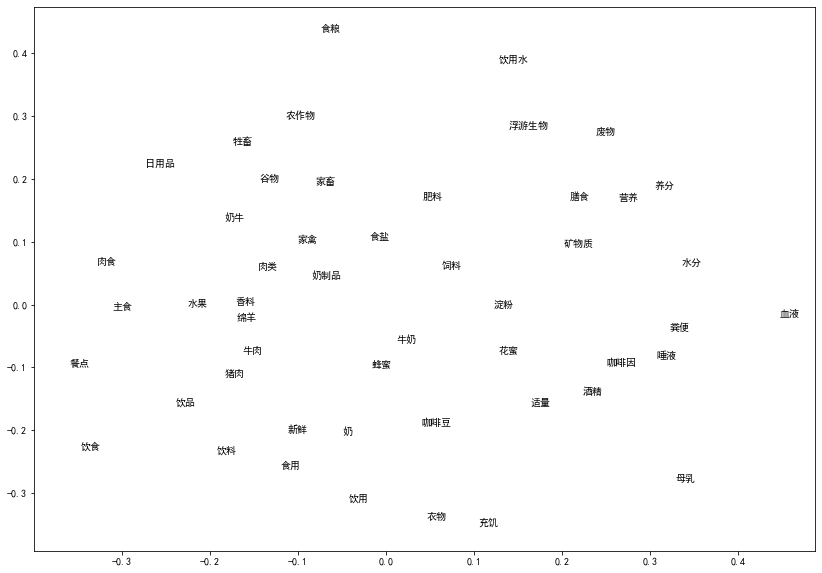

In [16]:
%matplotlib inline

from sklearn.metrics import pairwise
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

f_tokens = [token for token,weight in w2v_model.wv.most_similar(positive=['食物'], topn=50)]
vectors = [w2v_model.wv[word] for word in f_tokens]
dist_matrix = pairwise.pairwise_distances(vectors, metric='cosine')
mds = MDS(n_components = 2, dissimilarity='precomputed')
embeddings = mds.fit_transform(dist_matrix)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
_, ax = plt.subplots(figsize=(14,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(vectors)):
    ax.annotate(f_tokens[i], ((embeddings[i,0], embeddings[i,1])))